# WINE QUALITY 

## Table of Contents
1. [Problem Statements](#section1)<br>
2. [Importing the libraries](#section2)<br>
3. [Importing the Dataset](#section2)<br>
4. [Quality Check](#section3)<br>
5. [Correlation Check](#section4)<br>
6. [Binarization of Target variables](#section5)<br>
7. [Pairplot](#section6)<br>
8. [Train Test Split](#section7)<br>
9. [Handling Imbalanced Data set](#section8)
10. [Apply PCA](#section9)
11. [Perform ML Algorithms](#section11)<br>

# Problem Statements

This datasets is related to red variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

# Importing the libraries

In [22]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      
pd.set_option('display.max_colwidth', -1)           
pd.options.display.max_columns = 50                 

import warnings
warnings.filterwarnings('ignore')


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      

In [24]:
!pip install plotly --upgrade

In [25]:
!pip install chart-studio

# Importing the dataset

In [26]:
df_wine = pd.read_csv("C:/nishant/winequality-red.csv")
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


###  Check the info of the dataset 

In [27]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Check the Shape of dataset

In [28]:
df_wine.shape

(1599, 12)

### Check the Null Values

In [29]:
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [30]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Check the descriptive statistics of the dataset

In [31]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Quality Check

In [32]:
df_wine.quality.value_counts()

5    681
6    638
7    199
4    53 
8    18 
3    10 
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

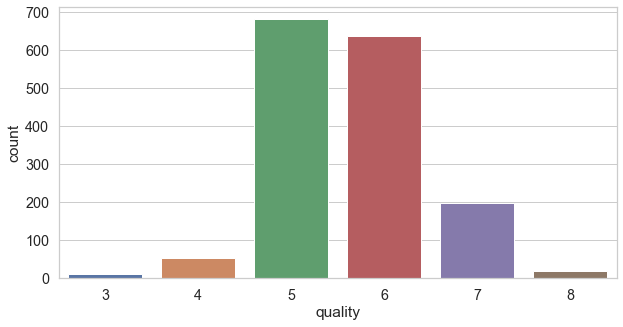

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(df_wine.quality)

<AxesSubplot:title={'center':'Popular Quality'}, ylabel='quality'>

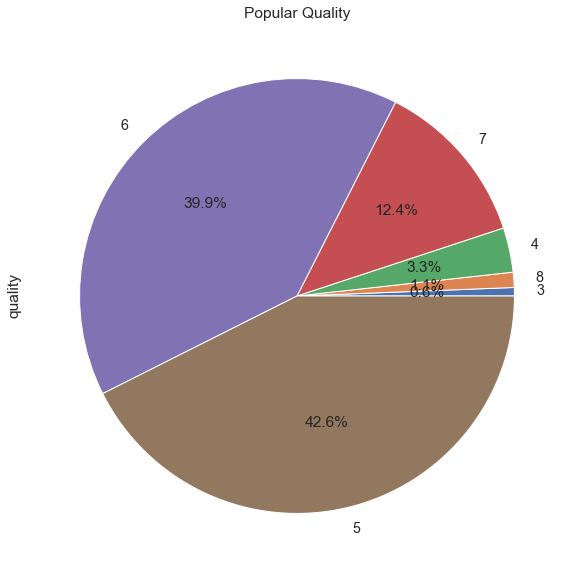

In [34]:
df_wine['quality'].value_counts().sort_values().plot(kind='pie',figsize=(10,10), autopct='%1.1f%%',title="Popular Quality")


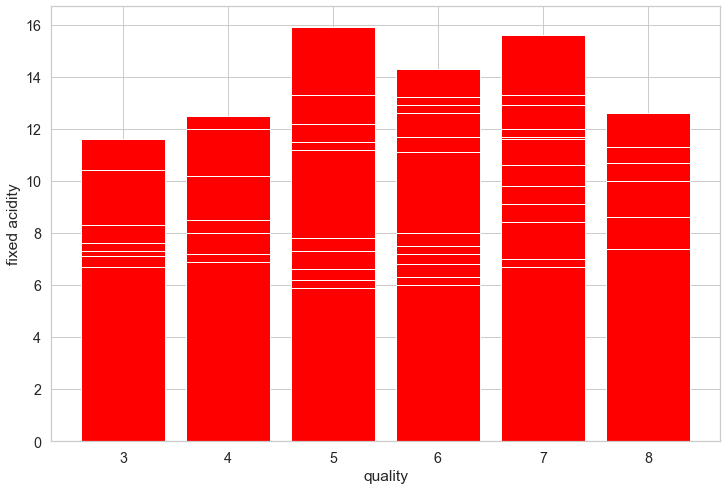

In [35]:
plt.figure(figsize=(12,8))
plt.bar(df_wine['quality'],df_wine['fixed acidity'], color='red')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.show()

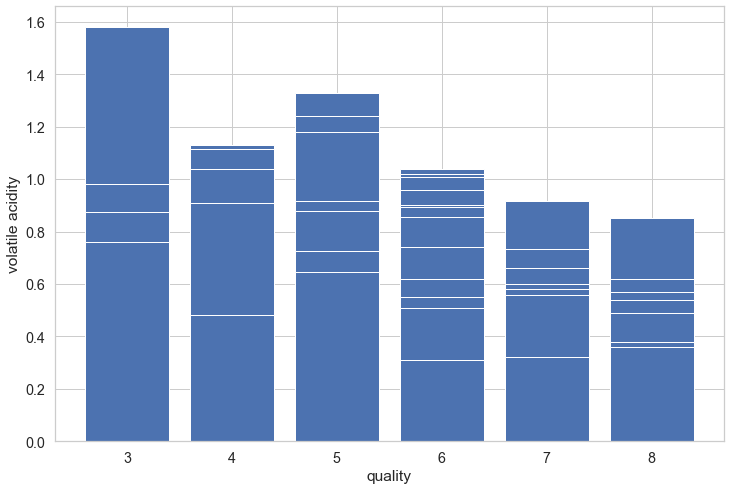

In [36]:
plt.figure(figsize=(12,8))
plt.bar(df_wine['quality'],df_wine['volatile acidity'])
plt.xlabel('quality')
plt.ylabel('volatile acidity')

plt.show()

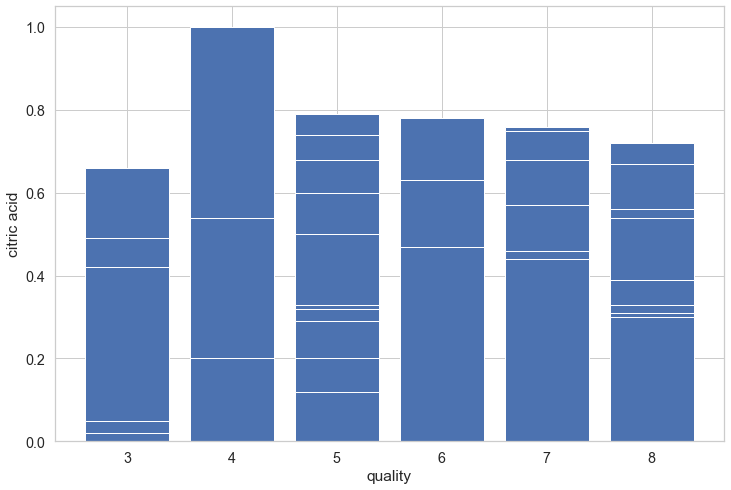

In [37]:
plt.figure(figsize=(12,8))
plt.bar(df_wine['quality'],df_wine['citric acid'])
plt.xlabel('quality')
plt.ylabel('citric acid')
plt.show()

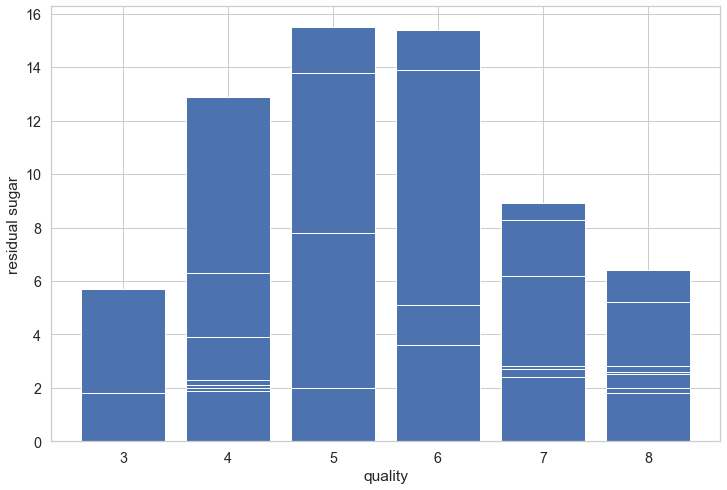

In [38]:
plt.figure(figsize=(12,8))
plt.bar(df_wine['quality'],df_wine['residual sugar'])
plt.xlabel('quality')
plt.ylabel('residual sugar')
plt.show()

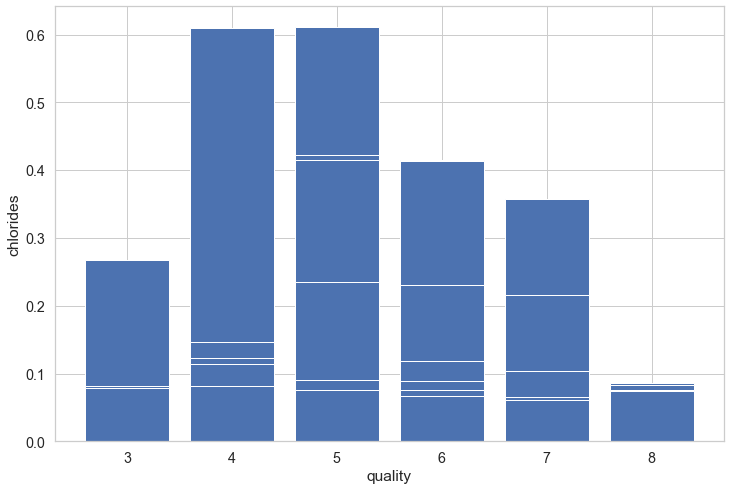

In [39]:
plt.figure(figsize=(12,8))
plt.bar(df_wine['quality'],df_wine['chlorides'])
plt.xlabel('quality')
plt.ylabel('chlorides')
plt.show()

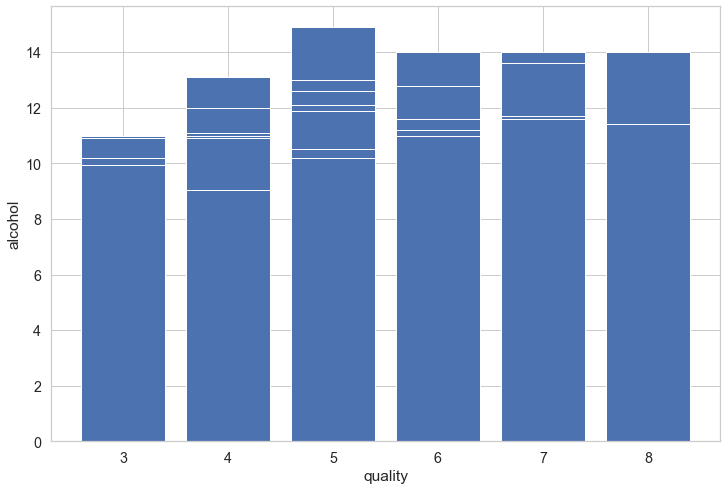

In [40]:
plt.figure(figsize=(12,8))
plt.bar(df_wine['quality'],df_wine['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

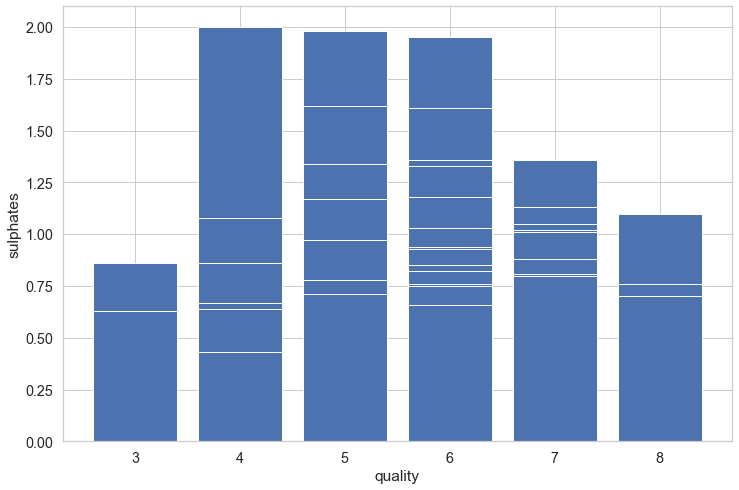

In [41]:
plt.figure(figsize=(12,8))
plt.bar(df_wine['quality'],df_wine['sulphates'])
plt.xlabel('quality')
plt.ylabel('sulphates')
plt.show()

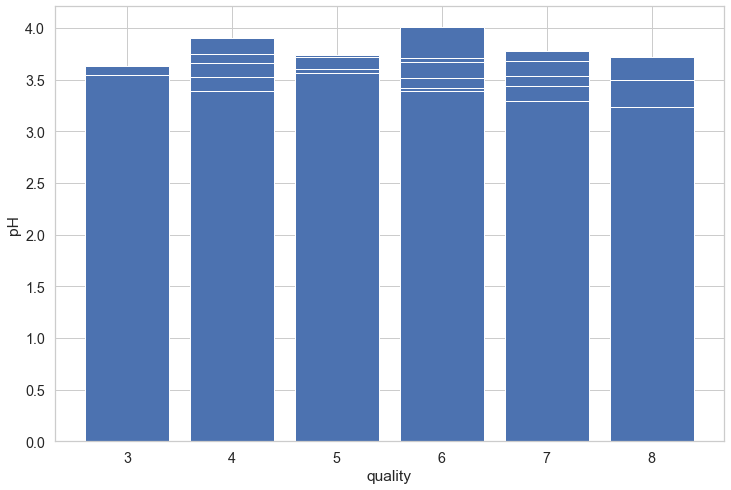

In [42]:
plt.figure(figsize=(12,8))
plt.bar(df_wine['quality'],df_wine['pH'])
plt.xlabel('quality')
plt.ylabel('pH')
plt.show()

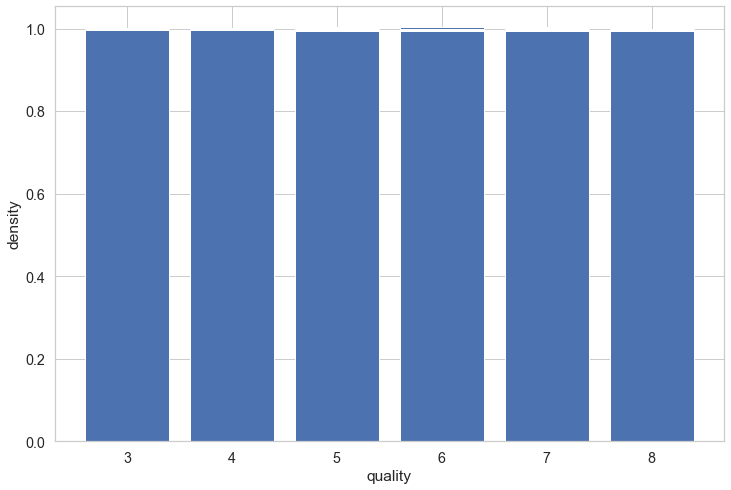

In [43]:
plt.figure(figsize=(12,8))
plt.bar(df_wine['quality'],df_wine['density'])
plt.xlabel('quality')
plt.ylabel('density')
plt.show()

## Correlation Check

<AxesSubplot:>

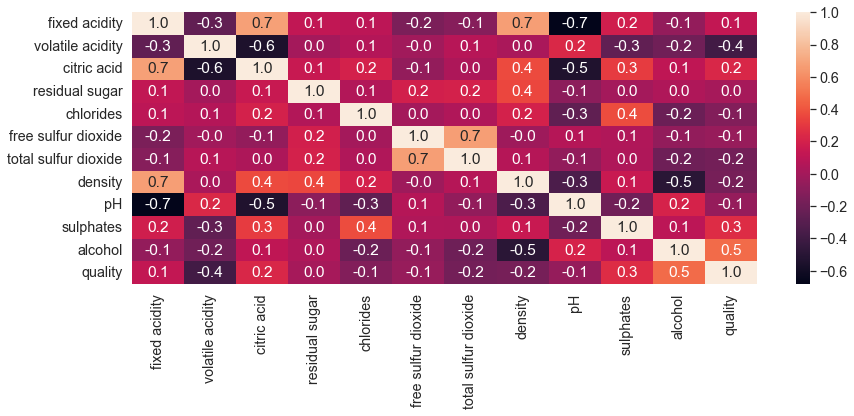

In [44]:
plt.figure(figsize=(14,5))
sns.heatmap(df_wine.corr(),annot=True, fmt='0.1f')


## Binarization of target variable

In [45]:
df_wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [46]:
df_wine['quality']=[1 if x>=7 else 0 for x in df_wine['quality']]

In [47]:
df_wine['quality'].unique()

array([0, 1], dtype=int64)

In [48]:
df_wine['quality'].value_counts()

0    1382
1    217 
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

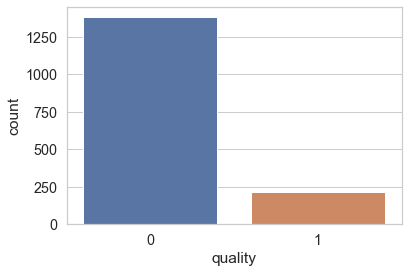

In [49]:
sns.countplot(df_wine['quality'])

## Pairplot

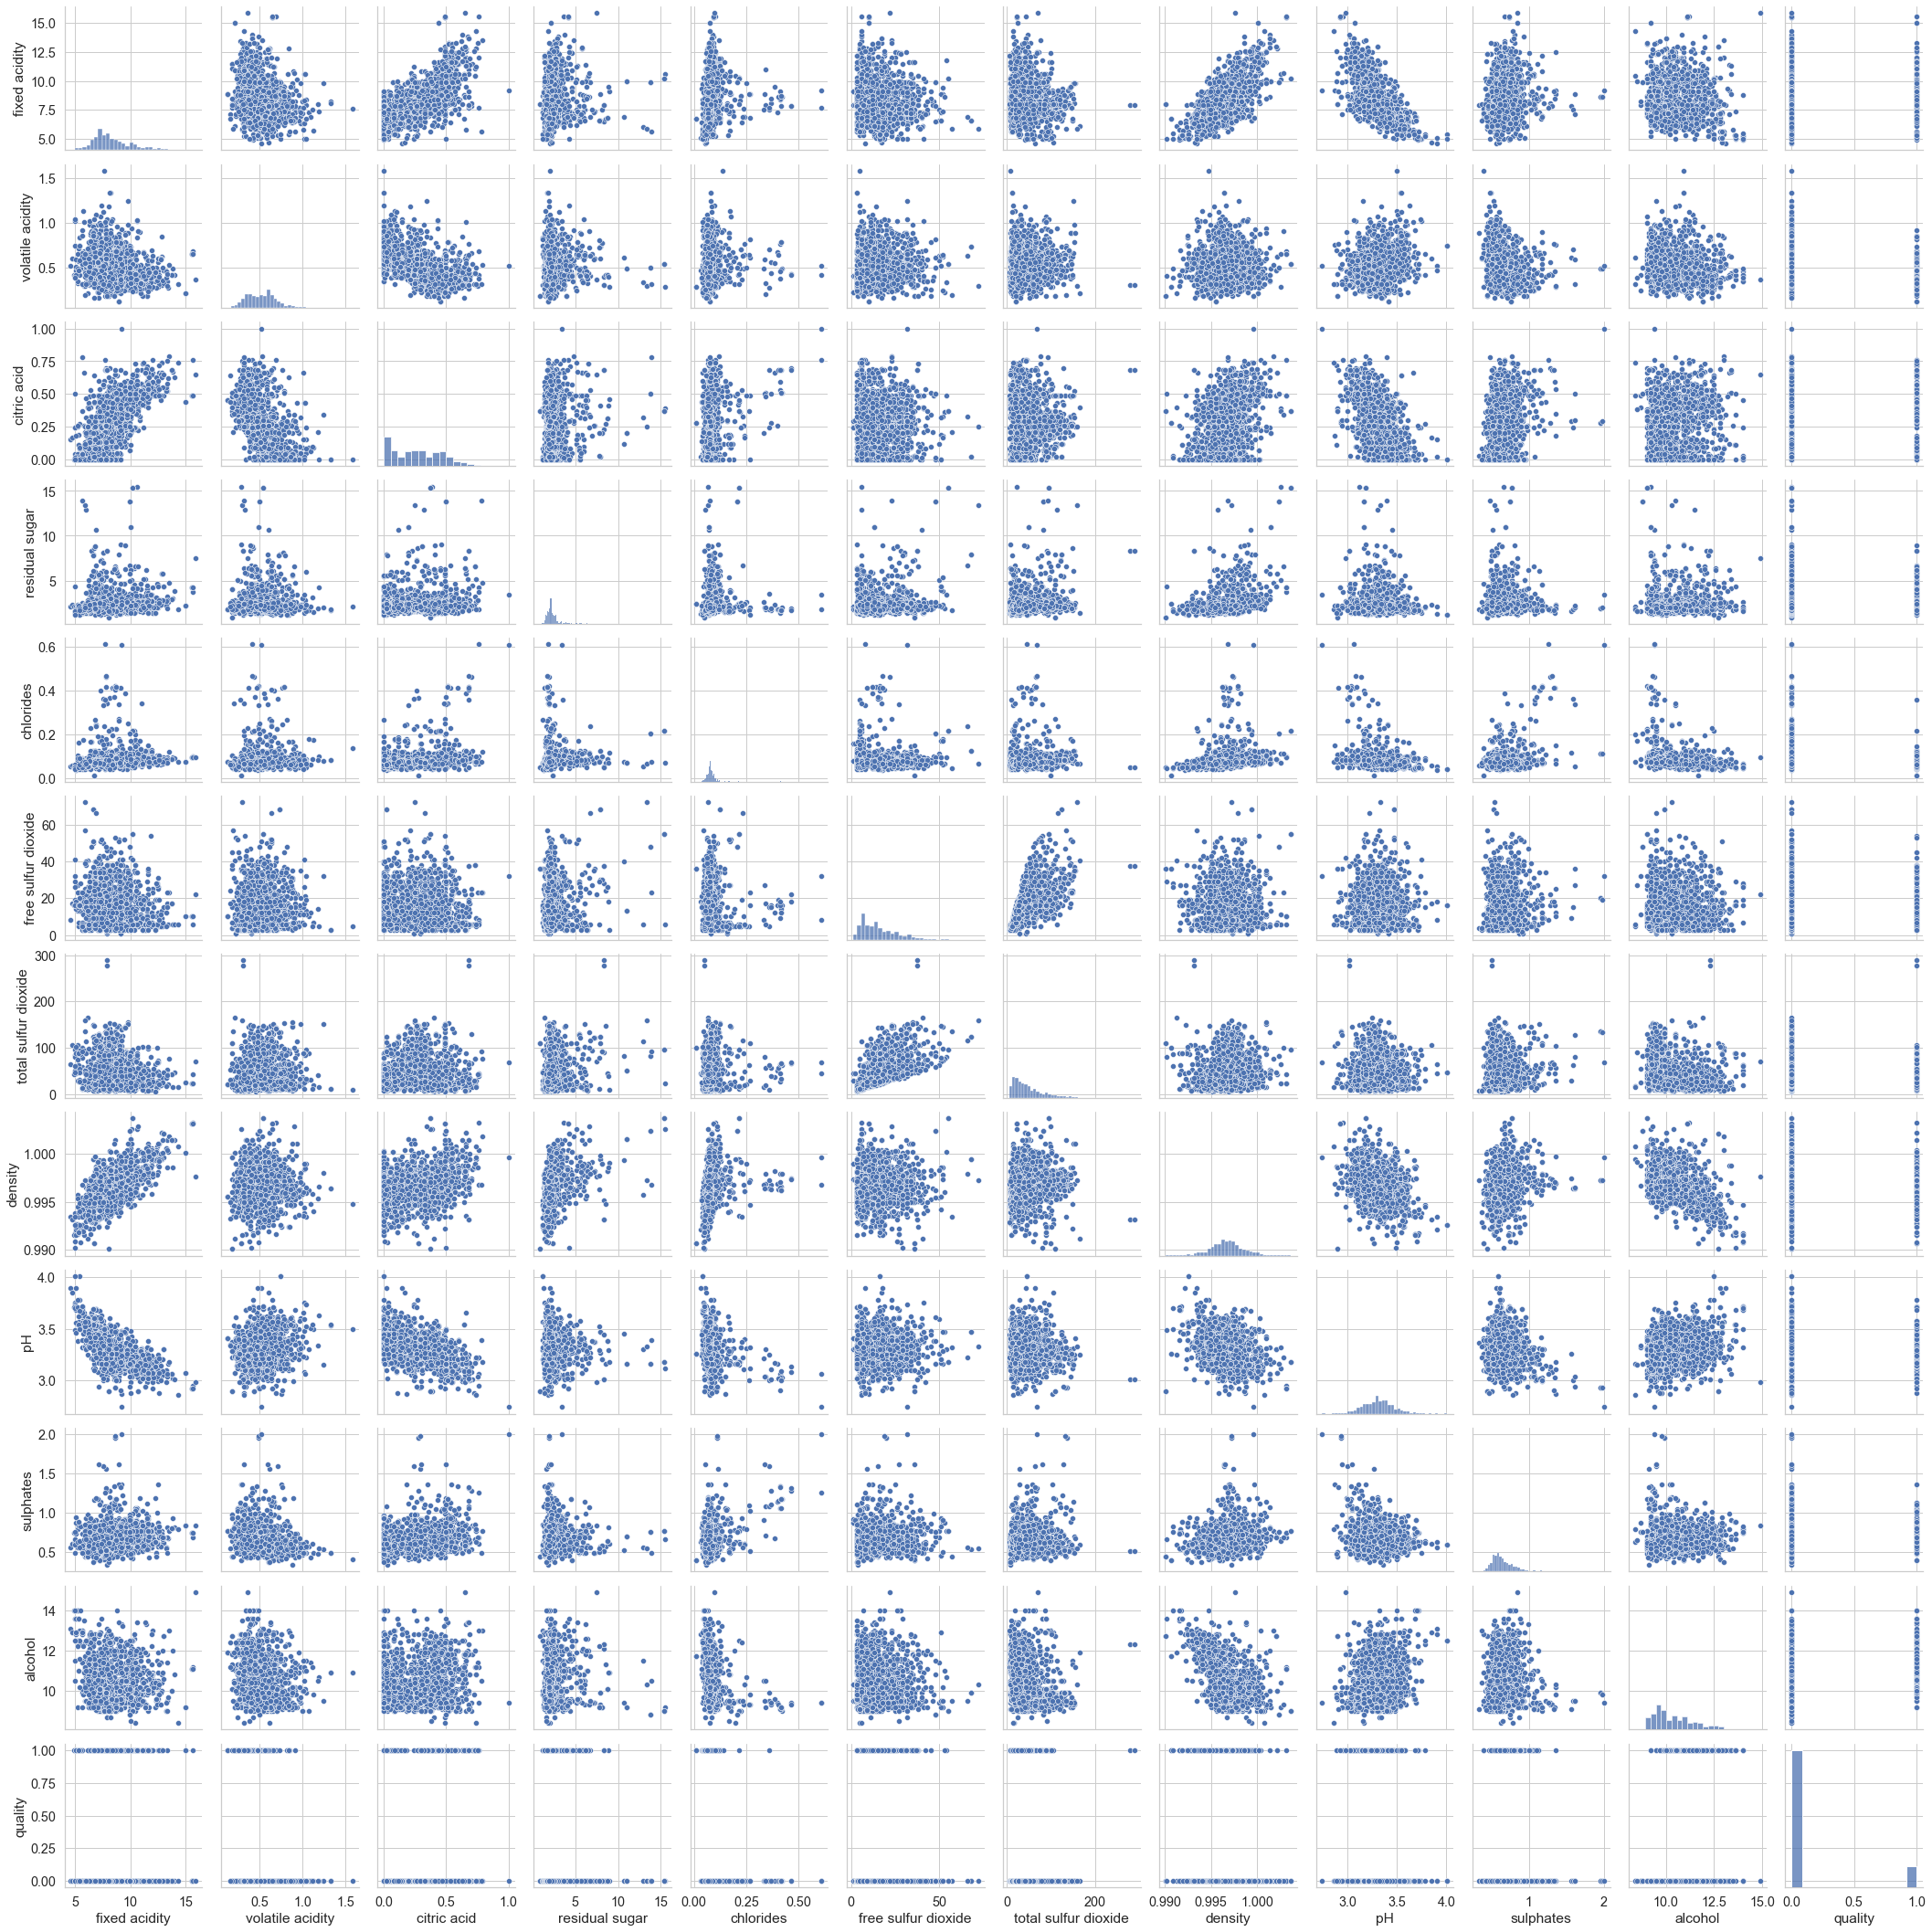

In [50]:
sns.pairplot(df_wine)

## Train Test Split

In [51]:
X = df_wine.drop('quality', axis=True)
y = df_wine['quality']

In [52]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [53]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

## Handling Imbalanced Dataset

In [54]:
from imblearn.over_sampling import SMOTE
os = SMOTE()
X_res,y_res = os.fit_resample(X,y)

In [55]:
y_res.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

## Shape of X & Y

In [56]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X_res, y_res, test_size= 0.25, random_state=0)

In [57]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)

In [58]:
X_train

array([[-0.4346802 , -0.57002377, -0.49652229, ..., -0.24663389,
        -0.27273333,  0.84904975],
       [-0.38943029, -0.79232048,  0.29557207, ...,  0.24519383,
        -0.68338887, -1.32056494],
       [ 0.84695995, -0.55533215,  0.34747564, ..., -1.04725305,
        -0.29748702, -2.10496066],
       ...,
       [-0.01291181, -0.83010761,  0.4687981 , ..., -0.3720691 ,
        -0.32157935,  0.45410519],
       [ 0.2358276 ,  0.02448087,  1.11689715, ..., -0.62885346,
        -0.67530595,  1.03481281],
       [-0.1224315 , -1.21453643,  0.43179544, ...,  0.02393258,
         0.04824585,  1.5445399 ]])

## Apply PCA

In [59]:
from sklearn.decomposition import PCA

In [60]:
pca = PCA(n_components=0.90)

In [61]:
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [62]:
pca.explained_variance_ratio_

array([0.28513016, 0.19405537, 0.16392236, 0.0972147 , 0.07906325,
       0.05521858, 0.04527617])

In [63]:
sum(pca.explained_variance_ratio_)

0.9198805963159393

# Perform ML Algorithms

## Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=0)
log.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [65]:
y_pred_log=log.predict(X_test)

In [66]:
from sklearn import metrics
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score

In [67]:
precision_score(y_test,y_pred_log)

0.72

In [68]:
accuracy_score(y_test, y_pred_log)

0.7337192474674384

In [69]:
recall_score(y_test,y_pred_log)

0.7455621301775148

In [70]:
f1_score(y_test,y_pred_log)

0.7325581395348838

In [71]:
Evaluation=pd.DataFrame(['logreg'],columns=['Algorithm'])

Evaluation.loc[0,'Precision']=metrics.precision_score(y_test, y_pred_log)
Evaluation.loc[0,'Recall']=metrics.recall_score(y_test, y_pred_log)
Evaluation.loc[0,'F1 Score']=metrics.f1_score(y_test, y_pred_log)
Evaluation.loc[0,'Accuracy']=metrics.accuracy_score(y_test,y_pred_log)

In [72]:
Evaluation

,Algorithm,Precision,Recall,F1 Score,Accuracy
0,logreg,0.72,0.745562,0.732558,0.733719


## SVM

In [73]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [74]:
y_pred_svm=svm.predict(X_test)

In [75]:
accuracy_score(y_test, y_pred_svm)

0.7250361794500724

In [76]:
precision_score(y_test,y_pred_svm)

0.7114285714285714

In [77]:
recall_score(y_test,y_pred_svm)

0.7366863905325444

In [78]:
f1_score(y_test,y_pred_svm)

0.7238372093023256

In [79]:
Evaluation.loc[1,'Algorithm']='SVM_linear'
Evaluation.loc[1,'Precision']=metrics.precision_score(y_test, y_pred_svm)
Evaluation.loc[1,'Recall']=metrics.recall_score(y_test, y_pred_svm)
Evaluation.loc[1,'F1 Score']=metrics.f1_score(y_test, y_pred_svm)
Evaluation.loc[1,'Accuracy']=metrics.accuracy_score(y_test,y_pred_svm)
Evaluation

,Algorithm,Precision,Recall,F1 Score,Accuracy
0,logreg,0.720000,0.745562,0.732558,0.733719
1,SVM_linear,0.711429,0.736686,0.723837,0.725036


## KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [81]:
y_pred_knn=knn.predict(X_test)

In [82]:
accuracy_score(y_test,y_pred_knn)

0.7047756874095513

In [83]:
precision_score(y_test,y_pred_knn)

0.6925287356321839

In [84]:
recall_score(y_test,y_pred_knn)

0.7130177514792899

In [85]:
f1_score(y_test,y_pred_knn)

0.7026239067055393

In [86]:
Evaluation.loc[2,'Algorithm']='knn'
Evaluation.loc[2,'Precision']=metrics.precision_score(y_test, y_pred_knn)
Evaluation.loc[2,'Recall']=metrics.recall_score(y_test, y_pred_knn)
Evaluation.loc[2,'F1 Score']=metrics.f1_score(y_test, y_pred_knn)
Evaluation.loc[2,'Accuracy']=metrics.accuracy_score(y_test,y_pred_knn)
Evaluation

,Algorithm,Precision,Recall,F1 Score,Accuracy
0,logreg,0.720000,0.745562,0.732558,0.733719
1,SVM_linear,0.711429,0.736686,0.723837,0.725036
2,knn,0.692529,0.713018,0.702624,0.704776


In [87]:
knn.score(X_test,y_test)


0.7047756874095513

## Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [89]:
y_pred_dtc = dtc.predict(X_test)

In [90]:
accuracy_score(y_test,y_pred_dtc)

0.6642547033285094

In [91]:
precision_score(y_test,y_pred_dtc)

0.7137096774193549

In [92]:
recall_score(y_test,y_pred_dtc)

0.5236686390532544

In [93]:
f1_score(y_test,y_pred_dtc)

0.6040955631399317

In [94]:
Evaluation.loc[3,'Algorithm']='Decision Tree'
Evaluation.loc[3,'Precision']=metrics.precision_score(y_test, y_pred_dtc)
Evaluation.loc[3,'Recall']=metrics.recall_score(y_test, y_pred_dtc)
Evaluation.loc[3,'F1 Score']=metrics.f1_score(y_test, y_pred_dtc)
Evaluation.loc[3,'Accuracy']=metrics.accuracy_score(y_test,y_pred_dtc)
Evaluation

,Algorithm,Precision,Recall,F1 Score,Accuracy
0,logreg,0.720000,0.745562,0.732558,0.733719
1,SVM_linear,0.711429,0.736686,0.723837,0.725036
2,knn,0.692529,0.713018,0.702624,0.704776
3,Decision Tree,0.713710,0.523669,0.604096,0.664255


In [95]:
dtc.score(X_test,y_test)

0.6642547033285094

## Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [97]:
y_pred_rf=rf.predict(X_test)

In [98]:
accuracy_score(y_test,y_pred_rf)

0.6989869753979739

In [99]:
precision_score(y_test,y_pred_rf)

0.7708333333333334

In [100]:
recall_score(y_test,y_pred_rf)

0.5473372781065089

In [101]:
f1_score(y_test,y_pred_rf)

0.6401384083044983

In [102]:
Evaluation.loc[4,'Algorithm']='RF'
Evaluation.loc[4,'Precision']=metrics.precision_score(y_test,y_pred_rf)
Evaluation.loc[4,'Recall']=metrics.recall_score(y_test,y_pred_rf)
Evaluation.loc[4,'F1 Score']=metrics.f1_score(y_test,y_pred_rf)
Evaluation.loc[4,'Accuracy']=metrics.accuracy_score(y_test,y_pred_rf)
Evaluation

,Algorithm,Precision,Recall,F1 Score,Accuracy
0,logreg,0.720000,0.745562,0.732558,0.733719
1,SVM_linear,0.711429,0.736686,0.723837,0.725036
2,knn,0.692529,0.713018,0.702624,0.704776
3,Decision Tree,0.713710,0.523669,0.604096,0.664255
4,RF,0.770833,0.547337,0.640138,0.698987


## Gradient Boosting Classifier

In [103]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [104]:
y_pred_gbc=gbc.predict(X_test)

In [105]:
accuracy_score(y_test,y_pred_gbc)

0.7351664254703328

In [106]:
precision_score(y_test,y_pred_gbc)

0.7355623100303952

In [107]:
recall_score(y_test,y_pred_gbc)

0.7159763313609467

In [108]:
f1_score(y_test,y_pred_gbc)

0.7256371814092953

In [109]:
Evaluation.loc[5,'Algorithm']='GBC'
Evaluation.loc[5,'Precision']=metrics.precision_score(y_test,y_pred_gbc)
Evaluation.loc[5,'Recall']=metrics.recall_score(y_test,y_pred_gbc)
Evaluation.loc[5,'F1 Score']=metrics.f1_score(y_test,y_pred_gbc)
Evaluation.loc[5,'Accuracy']=metrics.accuracy_score(y_test,y_pred_gbc)
Evaluation

,Algorithm,Precision,Recall,F1 Score,Accuracy
0,logreg,0.720000,0.745562,0.732558,0.733719
1,SVM_linear,0.711429,0.736686,0.723837,0.725036
2,knn,0.692529,0.713018,0.702624,0.704776
3,Decision Tree,0.713710,0.523669,0.604096,0.664255
4,RF,0.770833,0.547337,0.640138,0.698987
5,GBC,0.735562,0.715976,0.725637,0.735166


## Comparison of All Algorithms

In [110]:
pd.DataFrame({'Model':['logreg','SVM_kinear','knn','Decision Tree','RF','GBC'],
             'ACC':[accuracy_score(y_test,y_pred_log)*100,
                   accuracy_score(y_test,y_pred_svm)*100,
                   accuracy_score(y_test,y_pred_knn)*100,
                   accuracy_score(y_test,y_pred_dtc)*100,
                   accuracy_score(y_test,y_pred_rf)*100,
                   accuracy_score(y_test,y_pred_gbc)*100]})

,Model,ACC
0,logreg,73.371925
1,SVM_kinear,72.503618
2,knn,70.477569
3,Decision Tree,66.425470
4,RF,69.898698
5,GBC,73.516643


In [111]:
final=pd.DataFrame({'Model':['logreg','SVM_kinear','knn','Decision Tree','RF','GBC'],
             'ACC':[accuracy_score(y_test,y_pred_log)*100,
                   accuracy_score(y_test,y_pred_svm)*100,
                   accuracy_score(y_test,y_pred_knn)*100,
                   accuracy_score(y_test,y_pred_dtc)*100,
                   accuracy_score(y_test,y_pred_rf)*100,
                   accuracy_score(y_test,y_pred_gbc)*100]})

<AxesSubplot:xlabel='Model', ylabel='ACC'>

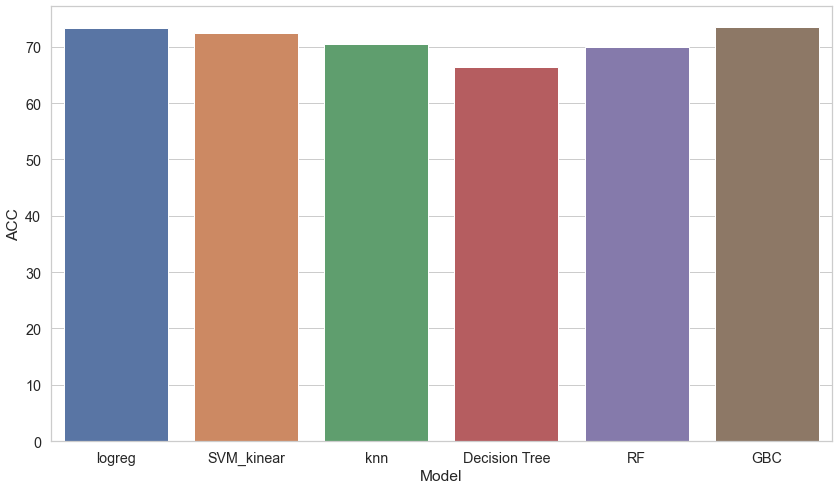

In [112]:
plt.figure(figsize=(14,8))
sns.barplot(final['Model'],final['ACC'])